<a href="https://colab.research.google.com/github/lucie-bacmann/colombia/blob/main/P01_Lucie_Bacmann_KNN_In_Class_ipynb_txt_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1. IMPORT LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from google.colab import files 

# **STEP 2. DATA IMPORT**

---



In [ ]:
# import "tumor.csv"
files.upload()

Saving tumor.csv to tumor.csv


{'tumor.csv': b'Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class\r\n1000025,5,1,1,1,2,1,3,1,1,2\r\n1002945,5,4,4,5,7,10,3,2,1,2\r\n1015425,3,1,1,1,2,2,3,1,1,2\r\n1016277,6,8,8,1,3,4,3,7,1,2\r\n1017023,4,1,1,3,2,1,3,1,1,2\r\n1017122,8,10,10,8,7,10,9,7,1,4\r\n1018099,1,1,1,1,2,10,3,1,1,2\r\n1018561,2,1,2,1,2,1,3,1,1,2\r\n1033078,2,1,1,1,2,1,1,1,5,2\r\n1033078,4,2,1,1,2,1,2,1,1,2\r\n1035283,1,1,1,1,1,1,3,1,1,2\r\n1036172,2,1,1,1,2,1,2,1,1,2\r\n1041801,5,3,3,3,2,3,4,4,1,4\r\n1043999,1,1,1,1,2,3,3,1,1,2\r\n1044572,8,7,5,10,7,9,5,5,4,4\r\n1047630,7,4,6,4,6,1,4,3,1,4\r\n1048672,4,1,1,1,2,1,2,1,1,2\r\n1049815,4,1,1,1,2,1,3,1,1,2\r\n1050670,10,7,7,6,4,10,4,1,2,4\r\n1050718,6,1,1,1,2,1,3,1,1,2\r\n1054590,7,3,2,10,5,10,5,4,4,4\r\n1054593,10,5,5,3,6,7,7,10,1,4\r\n1056784,3,1,1,1,2,1,2,1,1,2\r\n1059552,1,1,1,1,2,1,3,1,1,2\r\n1065726,5,2,3,4,2,7,3,6,1,4\r\n106637

In [ ]:
# read data
df = pd.read_csv('tumor.csv')

In [ ]:
# show data
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# drop 'Sample code number' since it is not a feature
df.drop('Sample code number', axis=1, inplace=True)

In [ ]:
# show data
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# **STEP 3. DATA PREPARATION**

---


Follow the steps seen in Chapter 1.


# **STEP 4. DATA TRANSFORMATION**

---



In Step 4, we verify that the data type was correctly detected. Indeed, sometimes the features type (*i.e. "x"*) and/or the target type (*i.e. "y"*) is/are wrong. If and when such a case arises :
*   **Target**    :Just specify the target type (*e.g. "df['target'] = df['target'].astype('category')", for a qualitative variable*) ;
*   **Features**  : Transformation is needed (*e.g. transform a qualitative feature into a dummy variable*).


In [ ]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In this example, the data type (*i.e. features and target*) was correctly detected. Therefore, no transformation is needed.

In [ ]:
# class labels and frequencies
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

# **STEP 5. DATA SPLITTING**

---



In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
# split the data into features (i.e. independent variable "x") and target (i.e. dependent variable "y")
x = df.drop('Class', axis=1)
y = df ['Class']

In [ ]:
# replace the values of y with 0 and 1 because in some cases Python expects a binary value
y.replace((2,4), (0,1), inplace=True)

In [ ]:
# new class labels and frequencies
y.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [ ]:
# split the data into a training set and a test set
# "random_state" ensures that we get the same training and test sets across different executions
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=2)

# **STEP 6. STANDARDIZATION**

---



In [ ]:
# import library
from sklearn.preprocessing import StandardScaler

# create the scaler (i.e. the scaling tool) that will perform the standardization
scaler = StandardScaler()

# for scaling, we need to calculate the mean and standard deviation of each feature 
# from the training set only
scaler.fit(x_train)

StandardScaler()



---




**1.   STANDARDIZATION OF X_TRAIN**



---



In [ ]:
# apply transformation to x_train (i.e. standardization)
stand_x_train = scaler.transform(x_train)

# create a new dataset with standardized training features (i.e. x_train)
# "columns=x_train" is used to implement column names from x_train
df_stand_x_train = pd.DataFrame(stand_x_train, columns=x_train.columns)

# show the new training set (features only)
df_stand_x_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2.006752,0.670790,0.654816,1.197226,2.128918,1.287025,1.481271,-0.591287,-0.333787
1,-1.193043,-0.677843,-0.703111,-0.614915,-0.526905,-0.659804,-0.971549,-0.591287,-0.333787
2,0.229088,-0.677843,-0.703111,-0.614915,-0.526905,-0.659804,-0.562746,-0.262259,-0.333787
3,1.295686,1.345106,0.994298,0.472370,0.358369,1.843262,0.663664,-0.591287,-0.333787
4,0.229088,-0.677843,-0.363629,-0.614915,-0.526905,-0.659804,-0.153943,-0.591287,-0.333787




---




**2.   STANDARDIZATION OF X_TEST** 


---







Now the same must be done with the test set (*i.e., x_test*).

*   **But there is a VERY important difference here**: we need to standardize x_test  using the mean and standard deviation obtained from x_train. But why exactly?


*   **Why don't we standardize everything and then split the dataset into training and test sets?** The idea of dividing a data set into a training set and a test set is to **NEVER** use the information from the test set to build the model. These observations should be completely new. We often say that they should not "pollute the model" or that they should not "seep into the model". If they are used to determine the overall mean and the standard deviation, it is no longer completely new information.


*   **Why do we standardize the features of the test set (*i.e., x_test*) using the statistics (*i.e., mean and standard deviation*) obtained from the training set?** The reason is that the same transformation should be applied to all features (*i.e., x_train and x_test*). It is as if the training set gives us a reference value.


---



In [ ]:
# apply transformation to x_test (i.e. standardization) 
# use the scaler defined previously
stand_x_test = scaler.transform(x_test)

# create a new dataset with standardized test features (i.e. x_test)
# "columns=x_test" is used to implement column names from x_test
df_stand_x_test = pd.DataFrame(stand_x_test,columns=x_test.columns)

# show the new test set (features only)
df_stand_x_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.584621,0.670790,0.315335,0.472370,-0.084268,1.565143,1.481271,1.711910,0.839376
1,1.295686,2.356580,2.352225,2.646939,0.801007,1.843262,1.890074,2.369966,2.599119
2,-1.193043,-0.677843,-0.703111,0.109942,-0.526905,-0.659804,-0.971549,-0.591287,-0.333787
3,2.006752,2.356580,1.673262,2.646939,1.243644,0.452670,2.707681,0.066769,-0.333787
4,-0.481977,-0.677843,-0.703111,-0.614915,-0.526905,0.452670,0.663664,-0.591287,-0.333787


# **STEP 7. K-NN ALGORITHM**

---



In [ ]:
# import library
from sklearn.neighbors import KNeighborsClassifier

# first model with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# model training
knn.fit(df_stand_x_train,y_train)

# prediction generation
y_pred = knn.predict(df_stand_x_test)

# **STEP 8. "K" NUMBER**

---



In step 8, we will use the elbow method to find the optimal K value. For this, we check the error rate of models with different values of K.

In [ ]:
# create an empty list to gather error rates at different values of K
error_rate = []

# try different values of K from 1 to 40
for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i) # model building
  knn.fit(df_stand_x_train,y_train) # model training
  y_pred = knn.predict(df_stand_x_test) # prediction generation
  error_rate.append(np.mean(y_pred != y_test)) # error rate generation




---



We will now define the characteristics of the chart.

Text(0, 0.5, 'Error Rate')

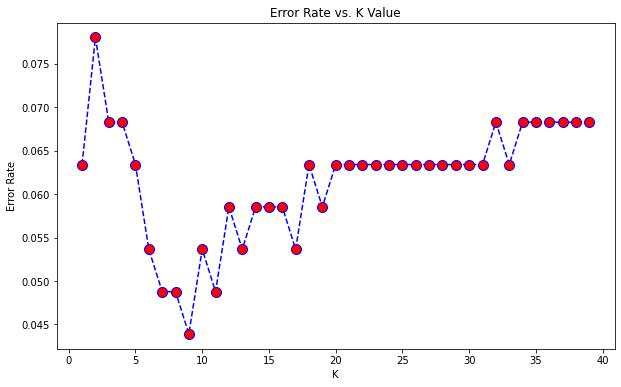

In [ ]:
# chart design
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# chart title
plt.title('Error Rate vs. K Value')

# axis label
plt.xlabel('K')
plt.ylabel('Error Rate')

# **STEP 9. PERFORMANCE MEASURE**

---



In [ ]:
# import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

***FIRST MODEL***

In [ ]:
# performance of the first model created with K=1
# model building
knn = KNeighborsClassifier(n_neighbors=1)
# model training
knn.fit(df_stand_x_train,y_train)
# prediction generation
y_pred = knn.predict(df_stand_x_test)

# print output title : "WITH K=1"
print('WITH K=1')
# add space between output lines
print('\n')

# print confusion matrix
print(confusion_matrix(y_test,y_pred))
# add space between output lines
print('\n')

# print other performance metrics 
print(classification_report(y_test,y_pred))

WITH K=1


[[118   7]
 [  6  74]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       125
           1       0.91      0.93      0.92        80

    accuracy                           0.94       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.94      0.94      0.94       205





---



***OPTIMAL MODEL***

In [ ]:
# performance of the first model created with K=9
# model building
knn = KNeighborsClassifier(n_neighbors=9)
# model training
knn.fit(df_stand_x_train,y_train)
# prediction generation
y_pred = knn.predict(df_stand_x_test)

# print output title : "WITH K=9"
print('WITH K=9')
# add space between output lines
print('\n')

# print confusion matrix
print(confusion_matrix(y_test,y_pred))
# add space between output lines
print('\n')

# print other performance metrics 
print(classification_report(y_test,y_pred))

WITH K=9


[[120   5]
 [  4  76]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       125
           1       0.94      0.95      0.94        80

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

